<a href="https://colab.research.google.com/github/JHermosillaD/Microalgae/blob/master/Chlorococum%2Btets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de la microalga Chlorococum sp

---

### Acerca:

Después de realizar el tracking con `Fiji` y extraer los datos, se calculó el desplazamiento cuadrático medio (MSD) apartir de las posiciónes obtenidas, según:
\begin{align}
\langle(\Delta r)^2\rangle = \frac{\sum_{i}^{N}\sqrt{(x_i-x_0)^2+(y_i-y_0)^2}}{N}
\end{align}

El comportaiento difusivo anómalo está dado por una relación no lineal entre el MSD y el tiempo. Donde el coeficiente difusión se puede hallar aplicando logaritmos a dicha relación.
\begin{align}
\lim_{t \to \infty} \langle(\Delta r)^2\rangle &\propto t^\alpha\\
y &= \beta t^\alpha \\
Ln(y) &= \alpha Ln(t) + Ln(\beta)
\end{align}
<figure>
<center>
<img src='https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/v-h-algas/Diffusion%20equation/image/v-h-algafgdfhs-1.jpg' />
<figcaption>Captura del stack al tiempo cero. </figcaption></center>
</figure>

---



### Paquetes usados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Tomando datos

spot 06 --> ID431 \\
spot 13 --> ID442 \\
spot 20 --> ID452 \\
spot 83 --> ID385



spot 02 --> ID70 \\
spot 03 --> ID71 \\
spot 04 --> ID72 \\
spot 11 --> ID79

#### Altas densidades


In [ ]:
frame_spot06 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/v-h-algas/Diffusion%20equation/data/family/ID06.csv')
frame_spot13 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/v-h-algas/Diffusion%20equation/data/family/ID13.csv')
frame_spot20 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/v-h-algas/Diffusion%20equation/data/family/ID20.csv')
frame_spot83 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/v-h-algas/Diffusion%20equation/data/family/ID83.csv')

In [ ]:
x06 = np.array([frame_spot06["POSITION_X"]]).reshape(-1, 1)
y06 = np.array([frame_spot06["POSITION_Y"]]).reshape(-1, 1)
log_t06 = np.log(frame_spot06['POSITION_T'].drop([0]))

x13 = np.array([frame_spot13["POSITION_X"]]).reshape(-1, 1)
y13 = np.array([frame_spot13["POSITION_Y"]]).reshape(-1, 1)
log_t13 = np.log(frame_spot13['POSITION_T'].drop([0]))

x20 = np.array([frame_spot20["POSITION_X"]]).reshape(-1, 1)
y20 = np.array([frame_spot20["POSITION_Y"]]).reshape(-1, 1)
log_t20 = np.log(frame_spot20['POSITION_T'].drop([0]))

x83 = np.array([frame_spot83["POSITION_X"]]).reshape(-1, 1)
y83 = np.array([frame_spot83["POSITION_Y"]]).reshape(-1, 1)
log_t83 = np.log(frame_spot83['POSITION_T'].drop([0]))

#### Bajas densidades

In [ ]:
frame_spot02 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/data/spot2.csv')
frame_spot03 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/data/spot3.csv')
frame_spot04 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/data/spot4.csv')
frame_spot11 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/Case%206%20-%202750/data/spot11.csv')

In [ ]:
x02 = np.array([frame_spot02["POSITION_X"]]).reshape(-1, 1)
y02 = np.array([frame_spot02["POSITION_Y"]]).reshape(-1, 1)
log_t02 = np.log(frame_spot02['POSITION_T'].drop([0]))

x03 = np.array([frame_spot03["POSITION_X"]]).reshape(-1, 1)
y03 = np.array([frame_spot03["POSITION_Y"]]).reshape(-1, 1)
log_t03 = np.log(frame_spot02['POSITION_T'].drop([0]))

x04 = np.array([frame_spot04["POSITION_X"]]).reshape(-1, 1)
y04 = np.array([frame_spot04["POSITION_Y"]]).reshape(-1, 1)
log_t04 = np.log(frame_spot02['POSITION_T'].drop([0]))

x11 = np.array([frame_spot11["POSITION_X"]]).reshape(-1, 1)
y11 = np.array([frame_spot11["POSITION_Y"]]).reshape(-1, 1)
log_t11 = np.log(frame_spot02['POSITION_T'].drop([0]))

In [ ]:
frame_spot02.head()

,TRACK_ID,POSITION_X,POSITION_Y,POSITION_T,MSD,Ln(t),Ln(MSD)
0,2,291.485,73.834,0,0.000000,NaN,NaN
1,2,291.350,73.892,1,0.000137,0.000000,-8.895999
2,2,291.212,74.129,2,0.000375,0.693147,-7.889672
3,2,291.096,74.093,3,0.000436,1.098612,-7.738923
4,2,291.401,74.685,4,0.000797,1.386294,-7.134709


### Generando una función para aplicar una regresión lineal y graficar

In [ ]:
def MSD_Linear_regresion(x,y,log_t,z):
  N = len(x)-1
  MSD = np.zeros((N, 0))
  accumulated = 0
  i = 1

  while i <= N:
    difference = np.sqrt((x[i] - x[0])**2 + (y[i] - y[0])**2 )
    accumulated = accumulated + np.sum(difference)/N
    MSD = np.append(MSD, accumulated)
    i += 1

  MSD_log = np.log(MSD)
  x_train = np.array(log_t).reshape(-1, 1)
  y_train = np.array(MSD_log).reshape(-1, 1)

  Lr = LinearRegression()
  fit = Lr.fit(x_train, y_train)
  y_pred = Lr.predict(x_train)

  slope = fit.coef_[0][0]
  b = fit.intercept_[0]
  MSE = mean_squared_error(y_train, y_pred)
  RR = r2_score(y_train, y_pred)
  print(z,'->','slope: %.3f' % slope,'b: %.3f' % b, 'MSE: %.3f' % MSE, 'R^2 %.3f' % RR)
  
  g = sns.regplot(x=x_train,y=y_train, label=z)
  g.legend(loc="best")
  g.set(xlim=(0,7) , ylim=(-10,4))
  g.figure.set_size_inches(7, 14)          
  g.set_title(" Diffusion equation T = 1890 seg")
  g.set_ylabel("Ln(MSD)")
  g.set_xlabel("Ln(t)")


### Resultados
---



ID431 -> slope: 1.115 b: -7.761 MSE: 0.007 R^2 0.994
ID442 -> slope: 1.297 b: -7.954 MSE: 0.026 R^2 0.984
ID452 -> slope: 1.710 b: -9.449 MSE: 0.032 R^2 0.989
ID385 -> slope: 1.732 b: -9.575 MSE: 0.022 R^2 0.993


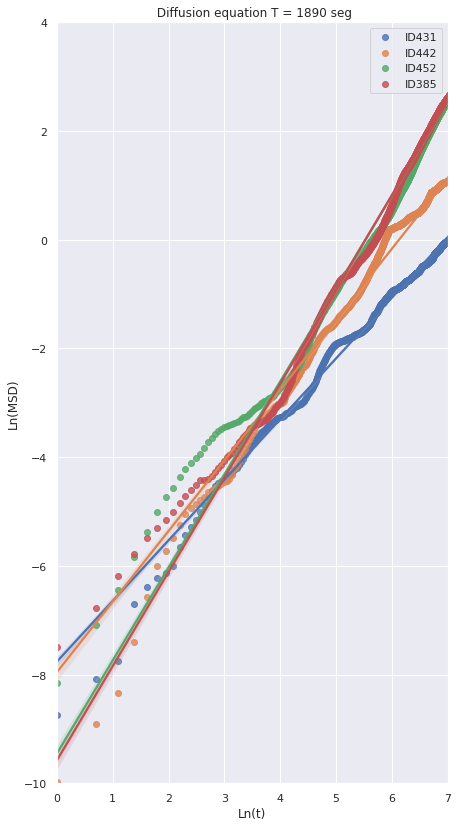

In [ ]:
# Altas densidades
MSD_Linear_regresion(x06,y06,log_t06,z='ID431')
MSD_Linear_regresion(x13,y13,log_t13,z='ID442')
MSD_Linear_regresion(x20,y20,log_t20,z='ID452')
MSD_Linear_regresion(x83,y83,log_t83,z='ID385')

ID70 -> slope: 1.507 b: -8.417 MSE: 0.040 R^2 0.982
ID71 -> slope: 1.488 b: -7.176 MSE: 0.093 R^2 0.959
ID72 -> slope: 1.491 b: -7.478 MSE: 0.053 R^2 0.976
ID79 -> slope: 1.265 b: -7.663 MSE: 0.018 R^2 0.988


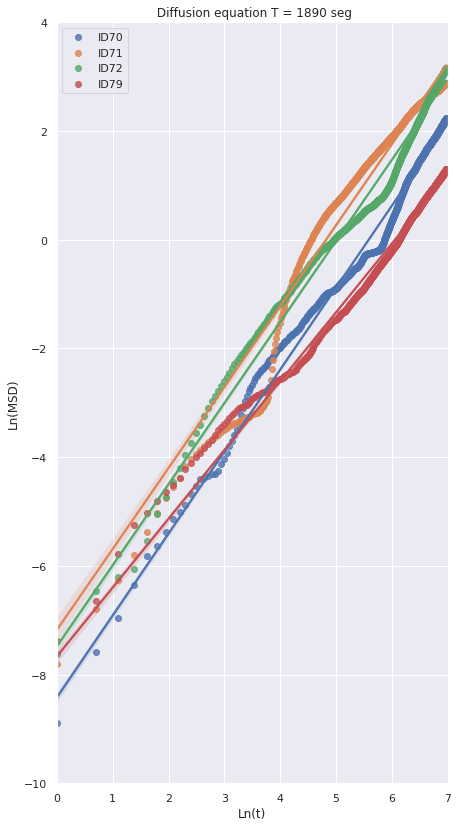

In [ ]:
# Bajas densidades
MSD_Linear_regresion(x02,y02,log_t02,z='ID70')
MSD_Linear_regresion(x03,y03,log_t03,z='ID71')
MSD_Linear_regresion(x04,y04,log_t04,z='ID72')
MSD_Linear_regresion(x11,y11,log_t11,z='ID79')

# Análisis de los polígonos de voronoi 

In [ ]:
import csv

### Tomando datos

In [ ]:
frame_0001 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/v-h-algas/Voronoi/data/connections-t-1.csv')
frame_0945 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/v-h-algas/Voronoi/data/connections-t-945.csv')
frame_1890 = pd.read_csv('https://raw.githubusercontent.com/JHermosillaD/Microalgae/master/v-h-algas/Voronoi/data/connections-t-1890.csv')

### Creo que filtrando

In [ ]:
def Buscando_atomos(dataframe):
 
  puntos = np.array(dataframe).reshape(-1,4)
  particulas_repetidas = np.array(dataframe[["x1","y1"]]).reshape(-1,2)
 
  b = np.ascontiguousarray(particulas_repetidas).view(np.dtype((np.void, particulas_repetidas.dtype.itemsize * particulas_repetidas.shape[1])))
  _, idx = np.unique(b, return_index=True)
  particulas = particulas_repetidas[idx]
 
  result = []
  for row in particulas:
    filtro = np.array(row)
    filtrado = puntos[(np.in1d(puntos[:, 0], filtro)) & (np.in1d(puntos[:, 1], filtro))]
    result.append(filtrado)

  atomos = np.array(result)
  #what = np.vectorize(atomos)
##  np.savetxt('anal3.txt',atomos,fmt='%5s',delimiter=',')
  #with open("testu.csv", "w+") as f:
  #  writer = csv.writer(f)
  #  writer.writerows(atomos)
  #pd.DataFrame(atomos[0]).to_csv("amonos2.csv")
  #print("Se encontraron " , len(atomos)," atomos")
 ## print(atomos)

In [ ]:
Buscando_atomos(frame_0001)